In [133]:
from google.colab import drive
drive.mount('/content/drive')
import cv2
import os
os.getcwd()
os.chdir("/content/drive/My Drive/Colab Notebooks/503044/FinalProject")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [135]:
df = pd.read_csv('./dataset/Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [136]:
# Print the shape of data
df.shape

(300153, 12)

In [137]:
# See the duplicated data
df.duplicated().sum()

0

In [ ]:
filtered_data = df[df['flight'].isin(['SG-8709'])]
filtered_data.head()

In [139]:
df=df.drop('Unnamed: 0',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


**TIỀN XỬ LÝ DỮ LIỆU**

In [140]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


**Thông tin chi tiết**
- Phương thức describe() trong Pandas được sử dụng để tạo số liệu thống kê mô tả về DataFrame hoặc một cột cụ thể trong DataFrame, thường dành cho dữ liệu số. Nó cung cấp các số liệu thống kê tóm tắt như số lượng, giá trị trung bình, độ lệch chuẩn, tối thiểu, tối đa và tứ phân vị cho mỗi cột.

- *Thời lượng (duration)* trung bình của các chuyến bay trong tập dữ liệu là 11,2 và thời lượng tối đa là 49,8 và thời lượng tối thiểu là 0,8.
- *Số ngày* trung bình *còn lại (days_left)* của các chuyến bay trong tập dữ liệu là 26 và số ngày còn lại tối đa là 49 và số ngày tối thiểu còn lại là 1.
- *Giá (price)* trung bình của các chuyến bay trong tập dữ liệu là 7425 và giá tối đa là 123071 và giá tối thiểu là 1105.

In [141]:
# Check for missing values (null values) in the data using Pandas
pd.DataFrame({"Missing values (%)" : round(df.isnull().sum()/len(df), 2)})

,Missing values (%)
airline,0.0
flight,0.0
source_city,0.0
departure_time,0.0
stops,0.0
arrival_time,0.0
destination_city,0.0
class,0.0
duration,0.0
days_left,0.0


In [142]:
# Check for nan values in the data using Pandas
pd.DataFrame({"N/A values (%)" : round(df.isna().sum()/len(df), 2)})

,N/A values (%)
airline,0.0
flight,0.0
source_city,0.0
departure_time,0.0
stops,0.0
arrival_time,0.0
destination_city,0.0
class,0.0
duration,0.0
days_left,0.0


In [143]:
for i in df:
    print(i)
    print(df[i].unique(), "\n")

airline
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India'] 

flight
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433'] 

source_city
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai'] 

departure_time
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night'] 

stops
['zero' 'one' 'two_or_more'] 

arrival_time
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night'] 

destination_city
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi'] 

class
['Economy' 'Business'] 

duration
[ 2.17  2.33  2.25  2.08 12.25 16.33 11.75 14.5  15.67  3.75  2.5   5.83
  8.    6.   14.67 16.17 18.   23.17 24.17  8.83  4.5  15.25 11.   19.08
 22.83 26.42 17.75 19.58 26.67 15.17 20.83 11.42 22.25 26.   21.75  3.83
  4.42  7.67  8.33 10.42 23.75 19.5   6.5  12.42 21.08 28.17 28.25  9.25
 17.92  7.08 13.83  7.58 15.83 24.42  4.17  4.25  5.08 29.33 17.   27.17
 24.75  5.75 12.75 13.75 17.83  5.5  23.83  5.   26.5  12.83  8.92 11.17
 12.

# TRỰC QUAN HOÁ DỮ LIỆU

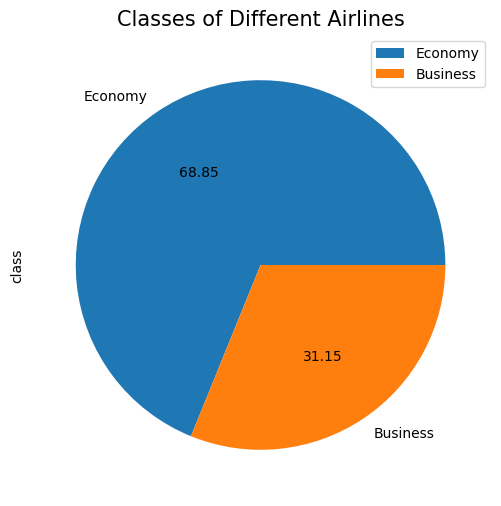

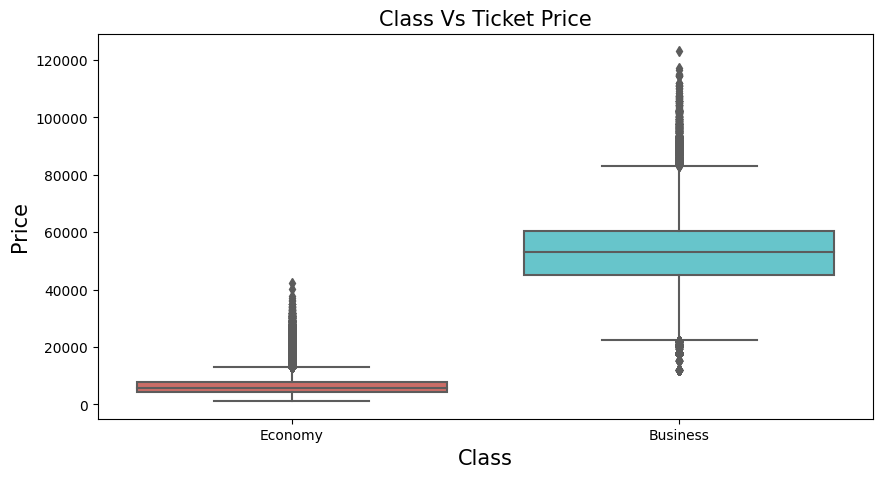

In [144]:
# Look at the percentages between classes and the price differences.
plt.figure(figsize=(8,6))
df['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [145]:
#  Displays economy class data
df_economy = df[df['class'] == 'Economy']
df_economy.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


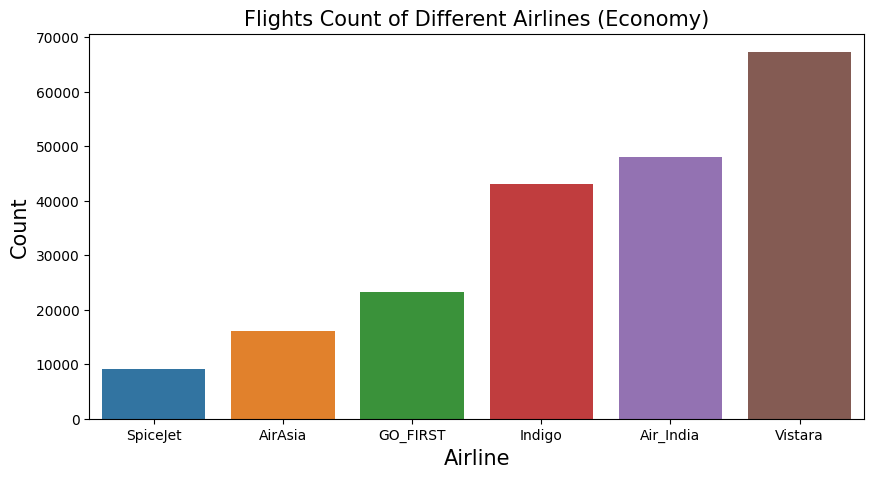

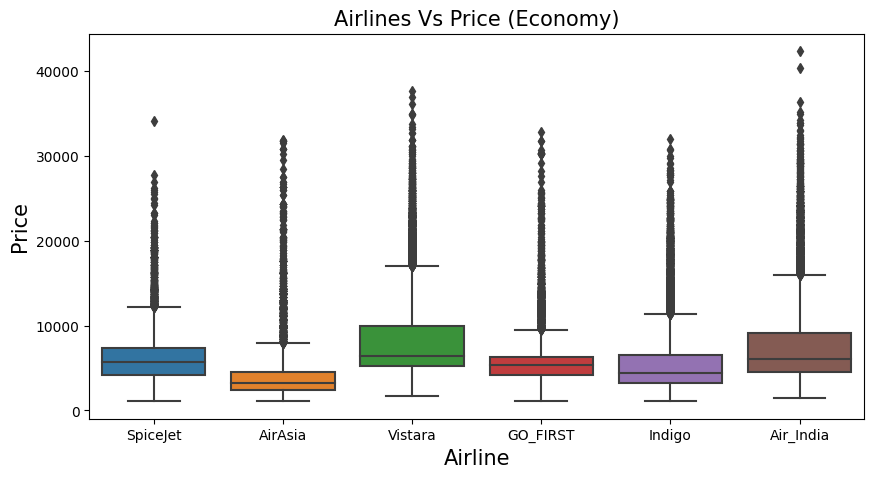

In [146]:
# Displays the number of flights between airlines and price comparisons.
plt.figure(figsize=(10,5))
sns.countplot(data=df_economy, x='airline', order=df_economy['airline'].value_counts().index[::-1])
plt.title('Flights Count of Different Airlines (Economy)', fontsize=15)
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=df_economy, x='airline',y='price')
plt.title('Airlines Vs Price (Economy)',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [147]:
#  Displays business class data
df_business = df[df['class'] == 'Business']
df_business.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
206666,Air_India,AI-868,Delhi,Evening,zero,Evening,Mumbai,Business,2.00,1,25612
206667,Air_India,AI-624,Delhi,Evening,zero,Night,Mumbai,Business,2.25,1,25612
206668,Air_India,AI-531,Delhi,Evening,one,Night,Mumbai,Business,24.75,1,42220
206669,Air_India,AI-839,Delhi,Night,one,Night,Mumbai,Business,26.50,1,44450
206670,Air_India,AI-544,Delhi,Evening,one,Night,Mumbai,Business,6.67,1,46690


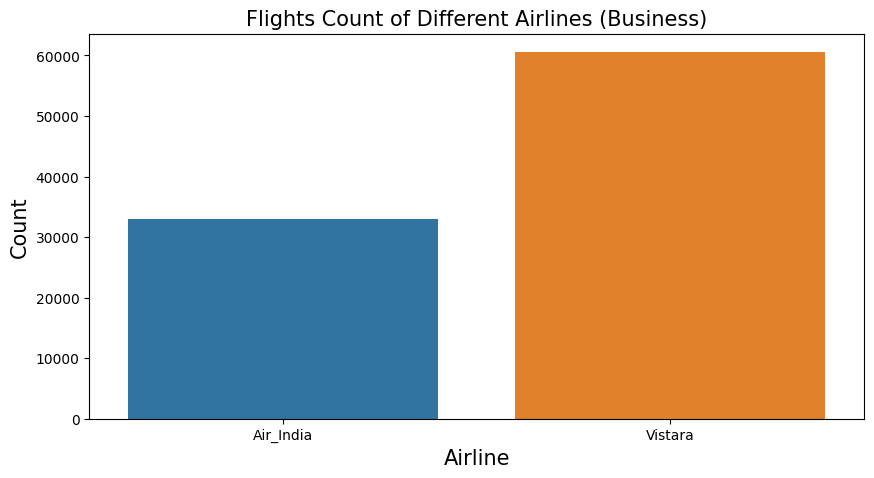

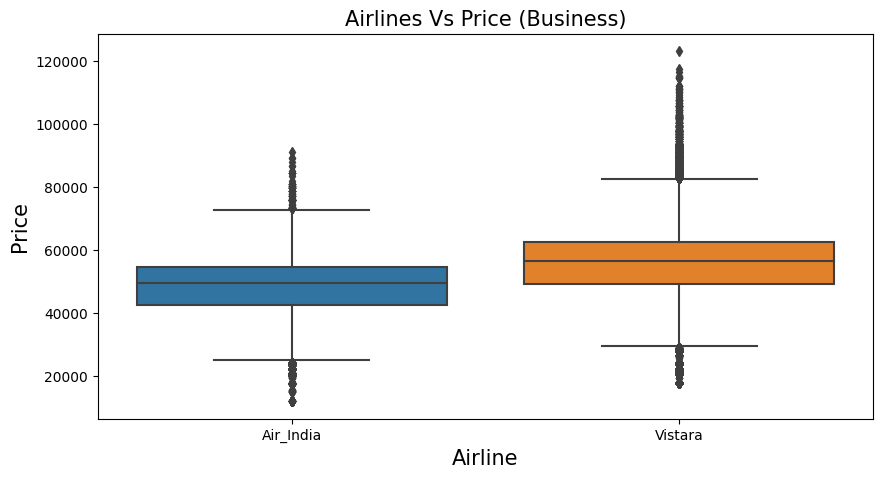

In [148]:
# Displays the number of flights between airlines and price comparisons.
plt.figure(figsize=(10,5))
sns.countplot(data=df_business, x='airline')
plt.title('Flights Count of Different Airlines (Business)',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=df_business, x='airline',y='price')
plt.title('Airlines Vs Price (Business)',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

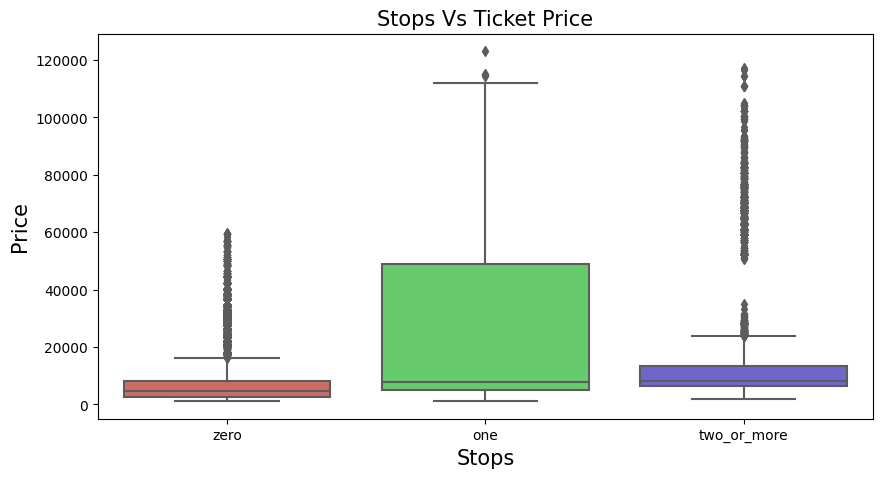

In [149]:
# Displays a price comparison between the number of stops
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

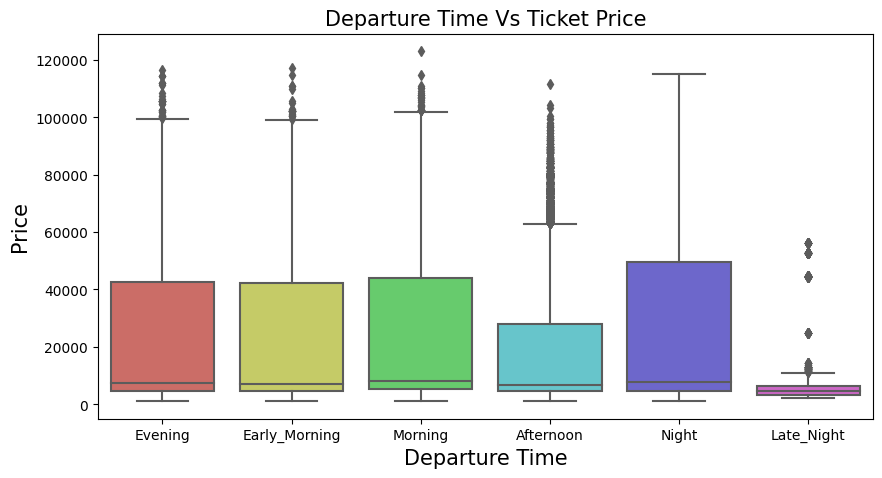

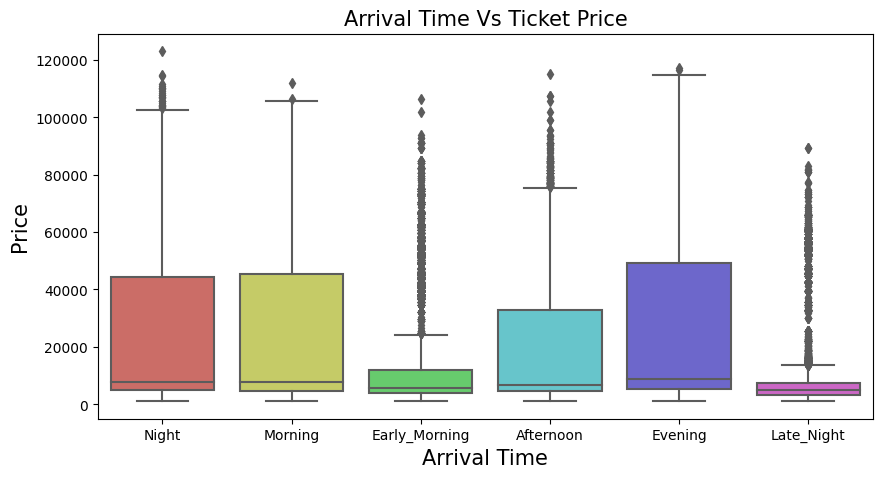

In [150]:
# Displays price comparison at departure time and arrival time
plt.figure(figsize=(10,5))
sns.boxplot(x='departure_time',y='price',data=df,palette='hls')
plt.title('Departure Time Vs Ticket Price',fontsize=15)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=15)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

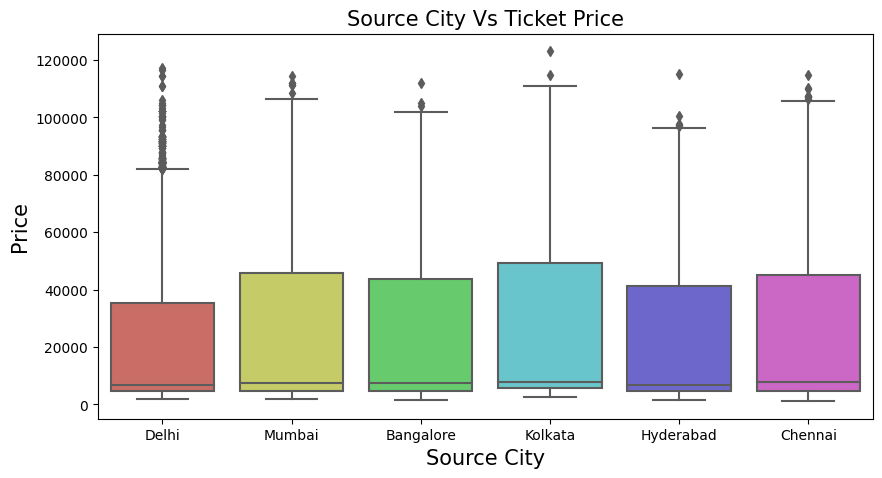

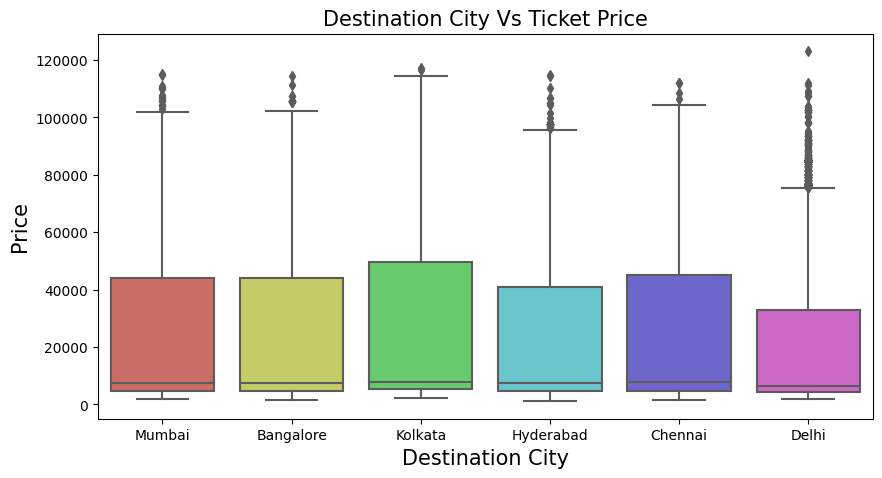

In [151]:
# Displays a price comparison in the destination city and source city
plt.figure(figsize=(10,5))
sns.boxplot(x='source_city',y='price',data=df,palette='hls')
plt.title('Source City Vs Ticket Price',fontsize=15)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='destination_city',y='price',data=df,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=15)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [152]:
# Displays the number of flights of each route
total_combination = df.groupby(['source_city', 'destination_city']).agg(combination_count=('price', 'size'), avg_price=('price', 'mean')).reset_index()

total_combination['route_name'] = total_combination['source_city'].str[0] + total_combination['destination_city'].str[0]

total_combination = total_combination.sort_values(by='combination_count', ascending=False)

print(total_combination)

   source_city destination_city  combination_count     avg_price route_name
14       Delhi           Mumbai              15289  19355.829812         DM
27      Mumbai            Delhi              14809  18725.320008         MD
10       Delhi        Bangalore              14012  17880.216315         DB
1    Bangalore            Delhi              13756  17723.313972         BD
4    Bangalore           Mumbai              12939  23128.618672         BM
25      Mumbai        Bangalore              12885  23147.873807         MB
29      Mumbai          Kolkata              12602  22379.146723         MK
13       Delhi          Kolkata              11934  20566.409418         DK
24     Kolkata           Mumbai              11467  22078.883579         KM
11       Delhi          Chennai              10780  19369.881354         DC
22     Kolkata            Delhi              10506  19422.354559         KD
28      Mumbai        Hyderabad              10470  21004.046705         MH
26      Mumb

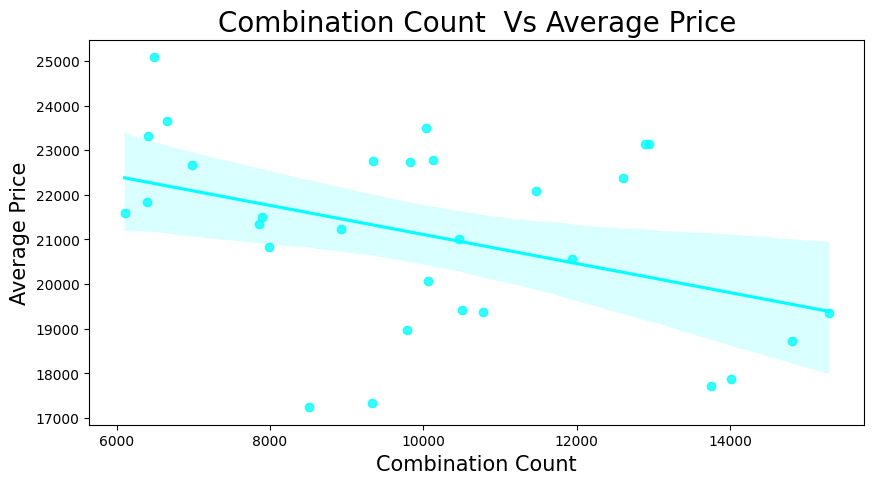

In [153]:
# Shows the effect of the number of flights on the price.
plt.figure(figsize=(10, 5))
sns.regplot(x='combination_count',y='avg_price',data=total_combination,color='cyan')
plt.title('Combination Count  Vs Average Price', fontsize=20)
plt.xlabel('Combination Count', fontsize=15)
plt.ylabel('Average Price', fontsize=15)
plt.show()

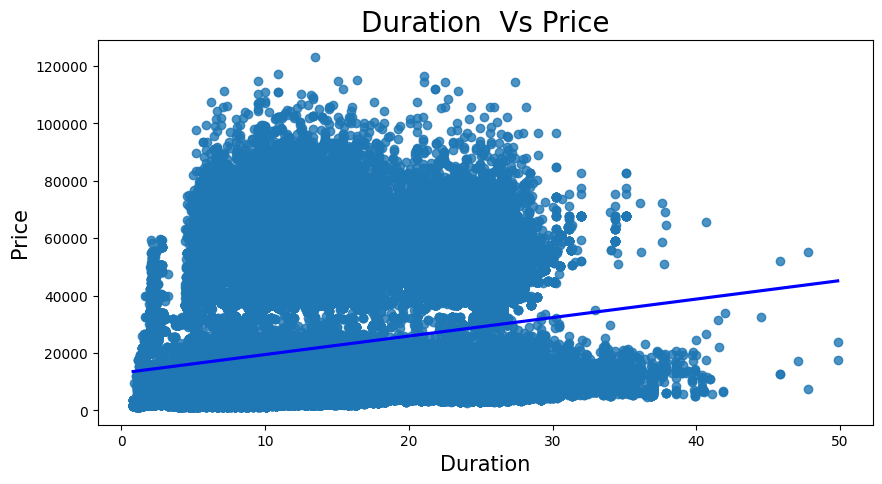

In [154]:
# Shows the effect of the duration of flights on the price.
plt.figure(figsize=(10, 5))
sns.regplot(x='duration', y='price', data=df, line_kws={'color': 'blue'})
plt.title('Duration  Vs Price', fontsize=20)
plt.xlabel('Duration', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

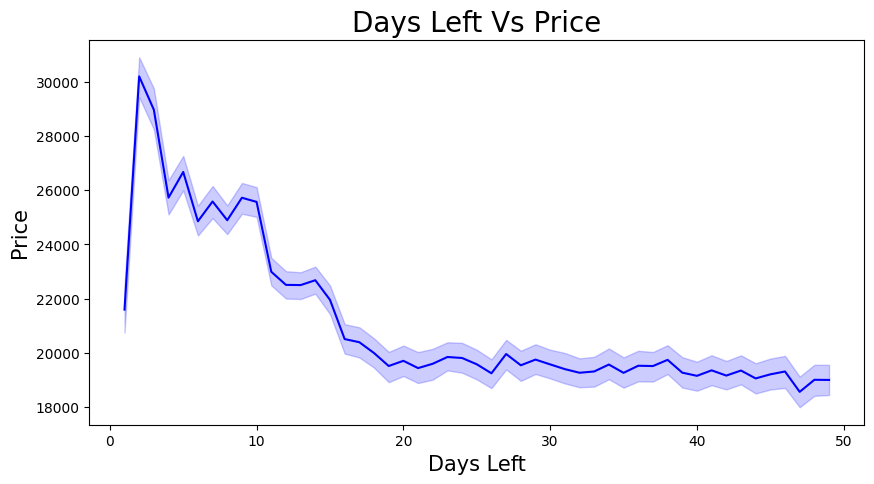

In [155]:
# Shows the effect of the days left of flights on the price.
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days Left Vs Price',fontsize=20)
plt.xlabel('Days Left',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

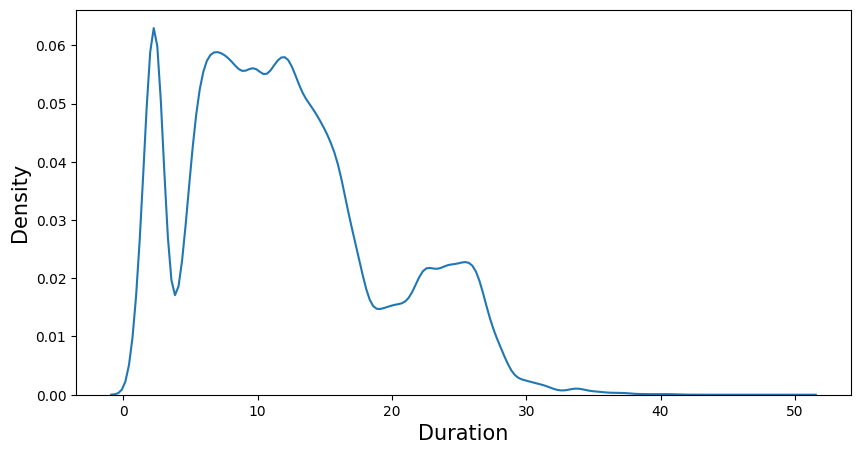

In [158]:
# Show the duration difference.
plt.figure(figsize=(10,5))
sns.kdeplot(data= df, x="duration")
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Density',fontsize=15) #Tỉ trọng
plt.show()

- Thời lượng bị lệch phải và có đỉnh cao trong khoảng từ 0 đến 5, nghĩa là các chuyến bay kéo dài từ 0 đến 5 giờ là chuyến bay thường xuyên nhất

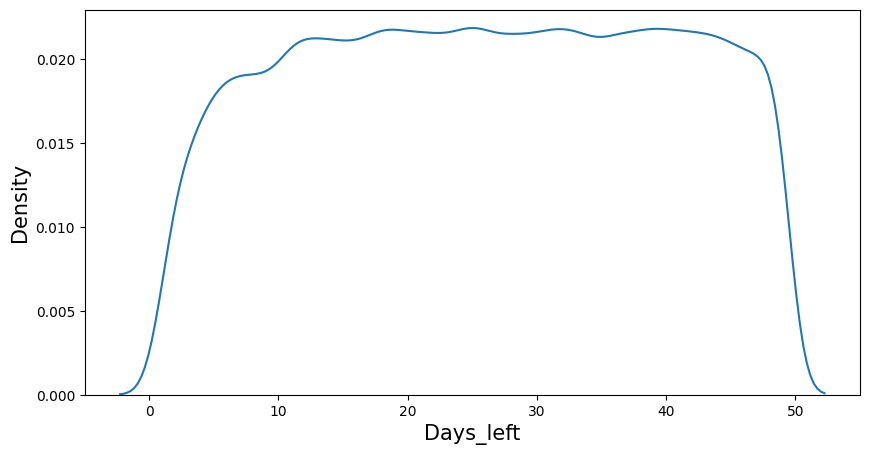

In [159]:
# Show the days_left difference.
plt.figure(figsize=(10,5))
sns.kdeplot(data= df, x="days_left")
plt.xlabel('Days_left',fontsize=15)
plt.ylabel('Density',fontsize=15) #Tỉ trọng
plt.show()

-	Days_left thường được phân phối với mức cao nhất từ 10 đến 40, cho thấy các chuyến bay hầu hết được bán khi số ngày còn lại nằm trong khoảng từ 10 đến 40.

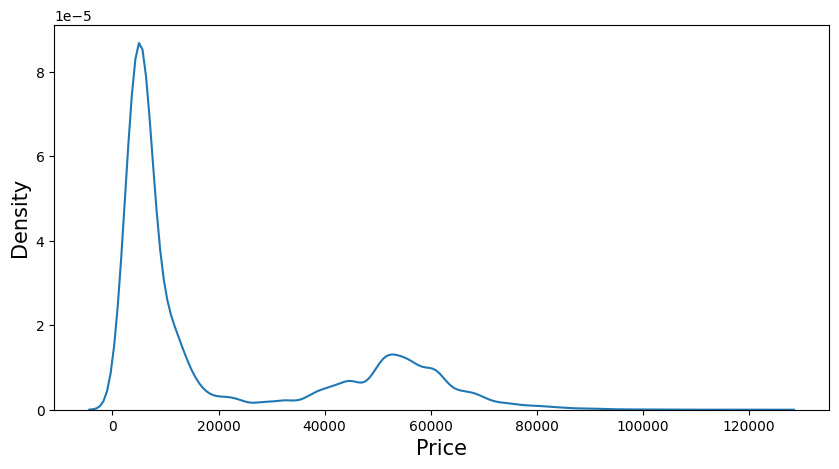

In [160]:
# Show the price difference.
plt.figure(figsize=(10,5))
sns.kdeplot(data= df, x="price")
plt.xlabel('Price',fontsize=15)
plt.ylabel('Density',fontsize=15) #Tỉ trọng
plt.show()

-	Giá lệch phải có mức cao nhất từ 0 đến 20.000, điều đó có nghĩa là các chuyến bay có giá nằm trong phạm vi này được bán thường xuyên

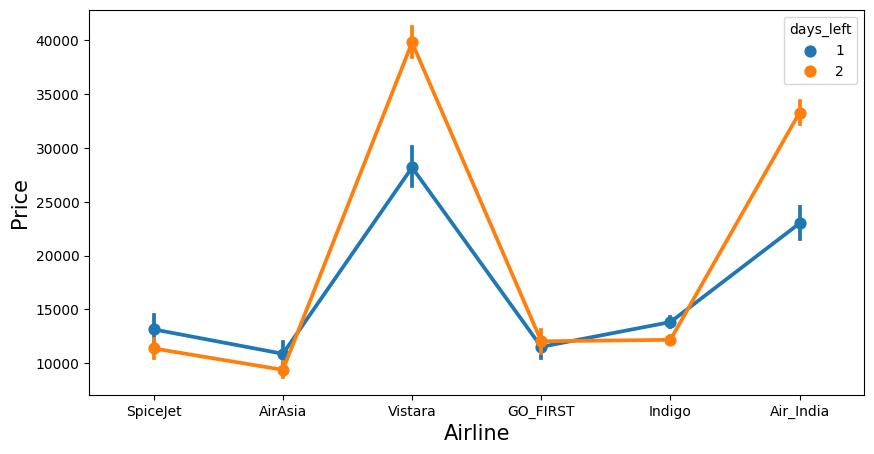

In [161]:
# Show significant price fluctuations when 1-2 days of departure remain.
filtered_data = df[df['days_left'].isin([1, 2])]

plt.figure(figsize=(10,5))
sns.pointplot(data=filtered_data, x='airline', y='price', hue='days_left')
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

-	Giá tăng đáng kể khi còn 1 hoặc 2 ngày cho chuyến bay đặc biệt của hãng hàng không Vistara và Air India

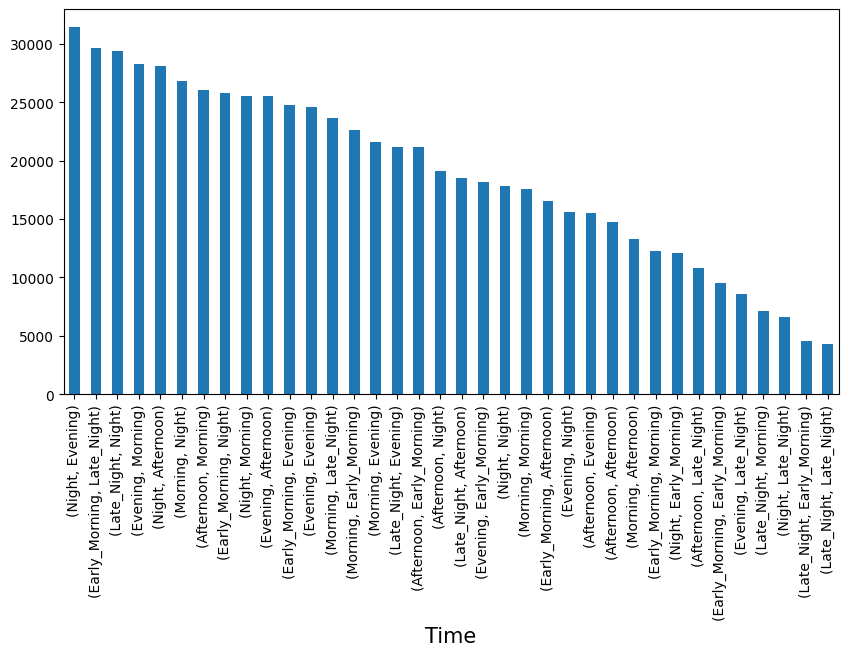

In [165]:
# Show significant price fluctuations when 1-2 days of departure remain.
grouped_data = df.groupby (['departure_time','arrival_time'])['price'] .mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
grouped_data.plot(kind='bar')

plt.xlabel('Time',fontsize=15)
plt.show()

-	Khởi hành và đến vào ban đêm có giá thấp nhất tuy nhiên khởi hành vào ban đêm và đến vào buổi tối có giá cao nhất

# ĐÁNH GIÁ MÔ HÌNH

**Tính mức độ ảnh hưởng của từng cột đến giá.**
Chuyển các nhãn thành dạng số bằng Bộ mã hóa nhãn để có thể đọc được bằng hồi quy tuyến tính -> Tạo mô hình hồi quy tuyến tính


In [ ]:
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

# Coverting the labels into a numeric form using Label Encoder so that it can be read by linear regression
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

# Create a linear regression model
X = df.drop('price', axis=1)
X = sm.add_constant(X)
y = df['price']

lin_reg = sm.OLS(y, X).fit()

print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 2.847e+05
Date:                Tue, 26 Dec 2023   Prob (F-statistic):               0.00
Time:                        02:37:02   Log-Likelihood:            -3.0838e+06
No. Observations:              300153   AIC:                         6.168e+06
Df Residuals:                  300142   BIC:                         6.168e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.044e+04     70.966  

*=> Từ kết quả chúng ta có thể thấy rằng mỗi cột đều có ảnh hưởng đáng kể đến giá cả.*

**Tìm mô hình tốt nhất cho dữ liệu**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Separating data into train and test
X=df.drop(['price'],axis=1)
y=df['price']

# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

# Scaling the values to convert the int values to Machine Languages
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(X_train)
x_test=mmscaler.fit_transform(X_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [ ]:
# Model initialization
rf_model = RandomForestRegressor()
et_model = ExtraTreesRegressor()
dt_model = DecisionTreeRegressor()
ln_model = LinearRegression()

# Fitting models to train data
rf_model.fit(X_train, y_train)
et_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
ln_model.fit(X_train, y_train)

# Make predictions on test data
rf_pred = rf_model.predict(X_test)
et_pred = et_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
ln_pred = ln_model.predict(X_test)

In [ ]:
# Model evaluation
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    rmsle = np.sqrt(np.mean(np.log1p(np.square(np.log1p(y_pred) - np.log1p(y_true)))))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    return mae, mse, rmse, r2, rmsle, mape

**MAE (Mean Absolute Error):** Đo lường sự chênh lệch trung bình giữa giá trị dự đoán và giá trị thực tế. Giá trị càng thấp càng tốt, vì nó chỉ tính giá trị tuyệt đối của sai số mà không quan tâm đến hướng.

**MSE (Mean Squared Error):** Đo lường sự chênh lệch bình phương trung bình giữa giá trị dự đoán và giá trị thực tế. Nó có xu hướng đặt trọng số lớn hơn cho các sai số lớn. Giá trị MSE cao thường cho thấy mô hình đang mắc phải các dự đoán lớn.

**RMSE (Root Mean Squared Error):** Là căn bậc hai của MSE, giúp đưa ra đánh giá về sự chênh lệch trung bình giữa giá trị dự đoán và giá trị thực tế. RMSE cũng giúp mô hình tránh được ảnh hưởng của các sai số lớn.

**R-squared (R2):** Đo độ giải thích của mô hình đối với phương sai của dữ liệu. Giá trị R2 gần 1 cho thấy mô hình giải thích được một phần lớn sự biến động của dữ liệu.

**RMSLE (Root Mean Squared Logarithmic Error):** Là biến thể của RMSE được áp dụng trên logarit của giá trị dự đoán và giá trị thực tế. Thường được sử dụng khi dự đoán dữ liệu có phạm vi rộng và có ý nghĩa khi các sai số nhỏ quan trọng hơn các sai số lớn.

**MAPE (Mean Absolute Percentage Error):** Đo lường tỷ lệ phần trăm trung bình giữa giá trị tuyệt đối của sự chênh lệch và giá trị thực tế. Giá trị càng thấp cho thấy mức độ chính xác của mô hình, nhưng nó cũng có thể bị ảnh hưởng bởi giá trị thực tế gần

In [ ]:
# Evaluate each model

rf_eval = evaluate_model(y_test, rf_pred)
print("RandomForestRegressor Evaluation:")
print(f"MAE: {rf_eval[0]:.2f}")
print(f"MSE: {rf_eval[1]:.2f}")
print(f"RMSE: {rf_eval[2]:.2f}")
print(f"R^2: {rf_eval[3]:.4f}")
print(f"RMSLE: {rf_eval[4]:.2f}")
print(f"MAPE: {rf_eval[5]:.2f}%\n")

et_eval = evaluate_model(y_test, et_pred)
print("ExtraTreesRegressor Evaluation:")
print(f"MAE: {et_eval[0]:.2f}")
print(f"MSE: {et_eval[1]:.2f}")
print(f"RMSE: {et_eval[2]:.2f}")
print(f"R^2: {et_eval[3]:.4f}")
print(f"RMSLE: {et_eval[4]:.2f}")
print(f"MAPE: {et_eval[5]:.2f}%\n")

dt_eval = evaluate_model(y_test, dt_pred)
print("DecisionTreeRegressor Evaluation:")
print(f"MAE: {dt_eval[0]:.2f}")
print(f"MSE: {dt_eval[1]:.2f}")
print(f"RMSE: {dt_eval[2]:.2f}")
print(f"R^2: {dt_eval[3]:.4f}")
print(f"RMSLE: {dt_eval[4]:.2f}")
print(f"MAPE: {dt_eval[5]:.2f}%\n")

ln_eval = evaluate_model(y_test, ln_pred)
print("LinearRegression Evaluation:")
print(f"MAE: {ln_eval[0]:.2f}")
print(f"MSE: {ln_eval[1]:.2f}")
print(f"RMSE: {ln_eval[2]:.2f}")
print(f"R^2: {ln_eval[3]:.4f}")
print(f"RMSLE: {ln_eval[4]:.2f}")
print(f"MAPE: {ln_eval[5]:.2f}%\n")

RandomForestRegressor Evaluation:
MAE: 893.84
MSE: 5632086.68
RMSE: 2373.20
R^2: 0.9891
RMSLE: 0.12
MAPE: 6.01%

ExtraTreesRegressor Evaluation:
MAE: 942.74
MSE: 6504812.52
RMSE: 2550.45
R^2: 0.9874
RMSLE: 0.12
MAPE: 6.40%

DecisionTreeRegressor Evaluation:
MAE: 910.08
MSE: 8861104.79
RMSE: 2976.76
R^2: 0.9828
RMSLE: 0.14
MAPE: 6.23%

LinearRegression Evaluation:
MAE: 4623.41
MSE: 49062056.15
RMSE: 7004.43
R^2: 0.9047
RMSLE: 0.42
MAPE: 43.66%



<ipython-input-104-ef75b61fc758>:7: RuntimeWarning: invalid value encountered in log1p
  rmsle = np.sqrt(np.mean(np.log1p(np.square(np.log1p(y_pred) - np.log1p(y_true)))))


**Phân tích đánh giá số liệu từ các mô hình RandomForestRegressor, ExtraTreesRegressor, DecisionTreeRegressor, và LinearRegression:**

***RandomForestRegressor:***

*MAE (Mean Absolute Error):* 893.84 - Độ lệch trung bình giữa giá trị dự đoán và giá trị thực tế là khá thấp, cho thấy mô hình có hiệu suất tốt trong việc dự đoán giá vé.

*RMSE (Root Mean Squared Error):* 2373.20 - Giá trị này cũng thấp, chỉ ra mức độ chênh lệch trung bình giữa dự đoán và thực tế.

*R^2 (R-squared):* 0.9891 - Gần 1, đây là một độ đo tốt về khả năng giải thích của mô hình đối với phương sai của dữ liệu.

*RMSLE (Root Mean Squared Logarithmic Error):* 0.12 - Giảm thiểu sự chênh lệch giữa giá trị dự đoán và giá trị thực tế khi dữ liệu có phạm vi rộng.

*MAPE (Mean Absolute Percentage Error):* 6.01% - Tỉ lệ phần trăm trung bình giữa sự chênh lệch và giá trị thực tế là khá thấp.

***ExtraTreesRegressor:***

Đánh giá tương tự với RandomForestRegressor, với mức độ chính xác và hiệu suất dự đoán khá cao.

***DecisionTreeRegressor:***

Hiệu suất dự đoán tương đối tốt, nhưng có vẻ dưới RandomForestRegressor và ExtraTreesRegressor.

***LinearRegression:***

*MAE:* 4623.41 - Độ lệch trung bình lớn hơn so với các mô hình DecisionTreeRegressor, cho thấy Linear Regression không phù hợp cho dự đoán giá vé chuyến bay trong trường hợp này.

*R^2:* 0.9047 - R^2 thấp hơn so với các mô hình DecisionTreeRegressor, chỉ ra rằng mô hình không giải thích được mức độ phương sai của dữ liệu như các mô hình cây quyết định.

**Tổng quan:**
Cả RandomForestRegressor và ExtraTreesRegressor đều có hiệu suất cao, với độ chính xác và khả năng dự đoán tốt.
DecisionTreeRegressor cũng cho kết quả tốt nhưng có vẻ dưới mức của các mô hình cây tổ hợp.
LinearRegression không phù hợp cho dự đoán giá vé trong trường hợp này, có thể do tính phi tuyến của dữ liệu.

# **RANDOM FOREST REGRESSOR**

In [ ]:
#Training the model with RandomForestRegressor
rf_model.fit(X_train, y_train)

# Predict the model with test data
y_pred = rf_model.predict(X_test)

In [ ]:
out_rf=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result_rf = df_1.merge(out_rf,left_index=True,right_index=True)
result_rf.sample(20)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
133946,SpiceJet,SG-8264,Kolkata,Night,one,Morning,Mumbai,Economy,11.67,40,5934,5934,6019.64
240852,Vistara,UK-986,Mumbai,Night,one,Afternoon,Hyderabad,Business,13.83,41,45805,45805,45805.00
191326,Air_India,AI-9894,Chennai,Morning,one,Evening,Mumbai,Economy,11.50,30,8914,8914,6409.65
187032,GO_FIRST,G8-302,Chennai,Early_Morning,one,Afternoon,Delhi,Economy,9.33,46,4827,4827,4827.00
269477,Vistara,UK-774,Kolkata,Night,one,Morning,Bangalore,Business,12.25,37,52287,52287,52287.00
55899,Air_India,AI-806,Mumbai,Early_Morning,one,Morning,Bangalore,Economy,24.92,19,6082,6082,6100.90
132800,AirAsia,I5-1563,Kolkata,Evening,two_or_more,Early_Morning,Mumbai,Economy,11.50,34,3379,3379,3380.71
53862,Indigo,6E-6051,Mumbai,Evening,one,Night,Bangalore,Economy,3.75,8,8300,8300,6075.51
181543,Air_India,AI-766,Chennai,Early_Morning,one,Morning,Delhi,Economy,26.25,11,10608,10608,11600.65
21142,Air_India,AI-401,Delhi,Early_Morning,zero,Morning,Kolkata,Economy,2.17,8,5955,5955,6318.26


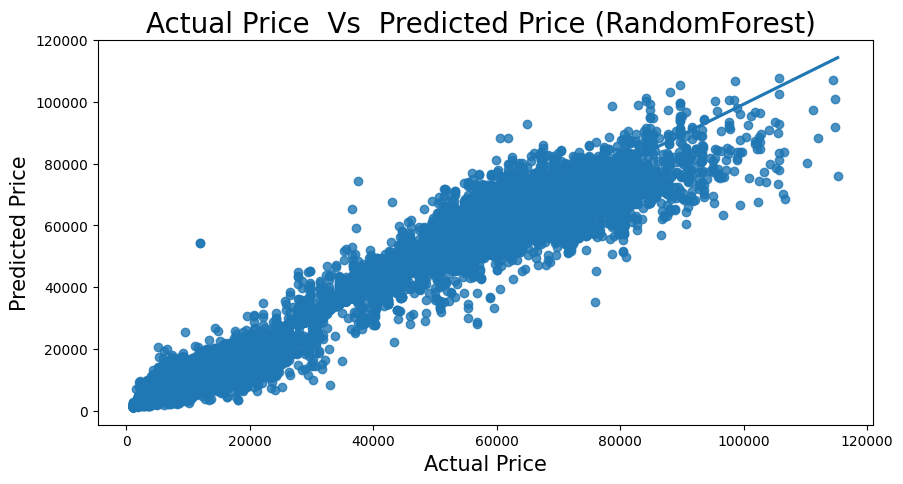

In [ ]:
# Display the graphic between actual price and prediction price.
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result_rf)
plt.title('Actual Price  Vs  Predicted Price (RandomForest) ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()

In [ ]:
# Calculates the percentage of equal values
matching_values = (result_rf['Price_actual'] == result_rf['Price_pred']).sum()
total_rows = len(result_rf)
percentage_matching = (matching_values / total_rows) * 100
print(f'The percentage of the same value: {percentage_matching:.2f}%')

The percentage of the same value: 23.01%


In [ ]:
# Calculate the percentage of values ​​where the price difference is not more than 500
within_500_diff = abs(result_rf['Price_pred'] - result_rf['Price_actual']) <= 500
matching_within_500 = within_500_diff.sum()
total_rows = len(result_rf)
percentage_within_500 = (matching_within_500 / total_rows) * 100
print(f'Price percentage with a difference of no more than 500: {percentage_within_500:.2f}%')

Price percentage with a difference of no more than 500: 71.10%


# LINEAR REGRESSOR

In [ ]:
#Trainig the model with
ln_model.fit(X_train, y_train)
# Predict the model with test data
y_pred = ln_model.predict(X_test)
out_ln=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result_ln = df_1.merge(out_ln,left_index=True,right_index=True)

result_ln.sample(20)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
246803,Vistara,UK-850,Bangalore,Evening,one,Morning,Delhi,Business,15.08,26,57081,57081,54411.954408
243289,Air_India,AI-442,Mumbai,Afternoon,one,Night,Chennai,Business,8.00,27,49613,49613,50287.794764
134270,SpiceJet,SG-242,Kolkata,Morning,zero,Afternoon,Mumbai,Economy,2.75,42,4813,4813,-772.336038
195436,Indigo,6E-605,Chennai,Afternoon,zero,Afternoon,Bangalore,Economy,1.08,23,1654,1654,-632.801084
272406,Vistara,UK-776,Kolkata,Evening,one,Early_Morning,Hyderabad,Business,14.25,46,49207,49207,51683.373080
126329,SpiceJet,SG-3281,Kolkata,Afternoon,one,Evening,Delhi,Economy,4.67,42,8903,8903,5838.186860
212013,Air_India,AI-868,Delhi,Evening,one,Evening,Bangalore,Business,24.50,2,47714,47714,54189.520464
278190,Air_India,AI-559,Hyderabad,Early_Morning,one,Night,Mumbai,Business,14.75,17,45883,45883,52542.313815
168304,Vistara,UK-880,Hyderabad,Afternoon,one,Night,Bangalore,Economy,7.00,28,6776,6776,9075.241193
56983,Indigo,6E-6818,Mumbai,Evening,one,Night,Bangalore,Economy,4.08,25,4056,4056,7402.398279


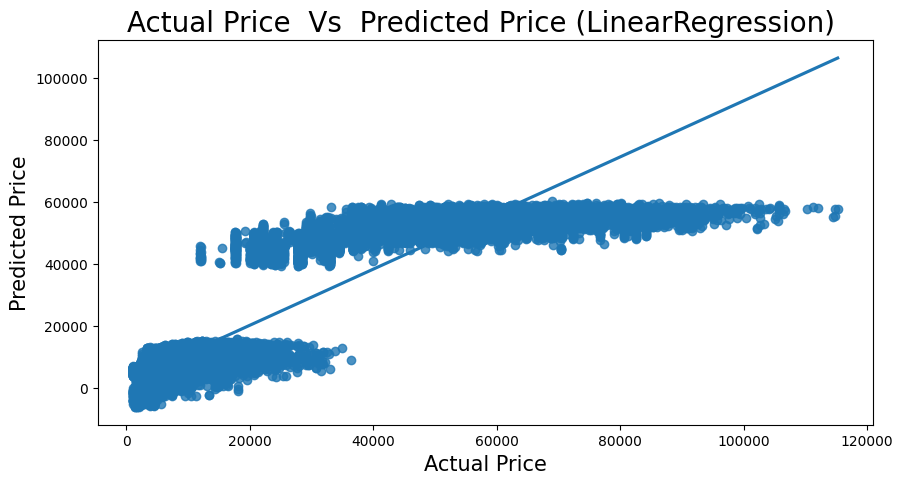

In [ ]:
# Display the graphic between actual price and prediction price.
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result_ln)
plt.title('Actual Price  Vs  Predicted Price (LinearRegression) ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()

In [ ]:
# Calculates the percentage of equal values
matching_values = (result_ln['Price_actual'] == result_ln['Price_pred']).sum()
total_rows = len(result_ln)
percentage_matching = (matching_values / total_rows) * 100
print(f'The percentage of the same value: {percentage_matching:.2f}%')

# Calculate the percentage of values ​​where the price difference is not more than 500
within_500_diff = abs(result_ln['Price_pred'] - result_ln['Price_actual']) <= 500
matching_within_500 = within_500_diff.sum()
total_rows = len(result_ln)
percentage_within_500 = (matching_within_500 / total_rows) * 100
print(f'Price percentage with a difference of no more than 500: {percentage_within_500:.2f}%')

The percentage of the same value: 0.00%
Price percentage with a difference of no more than 500: 9.07%


# EXTRA TREES REGRESSOR

In [130]:
#Trainig the model with ExtraTreesRegressor
et_model.fit(X_train, y_train)
# Predict the model with test data
y_pred = et_model.predict(X_test)
out_et=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result_et = df_1.merge(out_et,left_index=True,right_index=True)

result_et.sample(20)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
293870,Vistara,UK-824,Chennai,Night,one,Morning,Bangalore,Business,12.33,11,44144,44144,44144.00
15156,AirAsia,I5-783,Delhi,Early_Morning,one,Afternoon,Bangalore,Economy,6.75,27,3569,3569,3204.09
173878,Vistara,UK-880,Hyderabad,Afternoon,one,Evening,Kolkata,Economy,6.17,29,6275,6275,6212.34
88167,Vistara,UK-814,Bangalore,Night,zero,Night,Delhi,Economy,2.58,22,4502,4502,4496.98
267831,Vistara,UK-738,Kolkata,Evening,one,Morning,Bangalore,Business,17.08,10,71058,71058,69067.17
98248,Air_India,AI-505,Bangalore,Morning,one,Night,Mumbai,Economy,11.17,25,6158,6158,6162.20
269698,Vistara,UK-708,Kolkata,Night,one,Night,Bangalore,Business,24.00,40,60978,60978,64606.80
266247,Vistara,UK-706,Kolkata,Morning,one,Evening,Mumbai,Business,6.25,34,50271,50271,50394.20
157341,Vistara,UK-876,Hyderabad,Night,one,Afternoon,Delhi,Economy,16.50,40,5892,5892,5892.00
194398,Vistara,UK-822,Chennai,Morning,one,Evening,Bangalore,Economy,9.50,10,10222,10222,11120.88


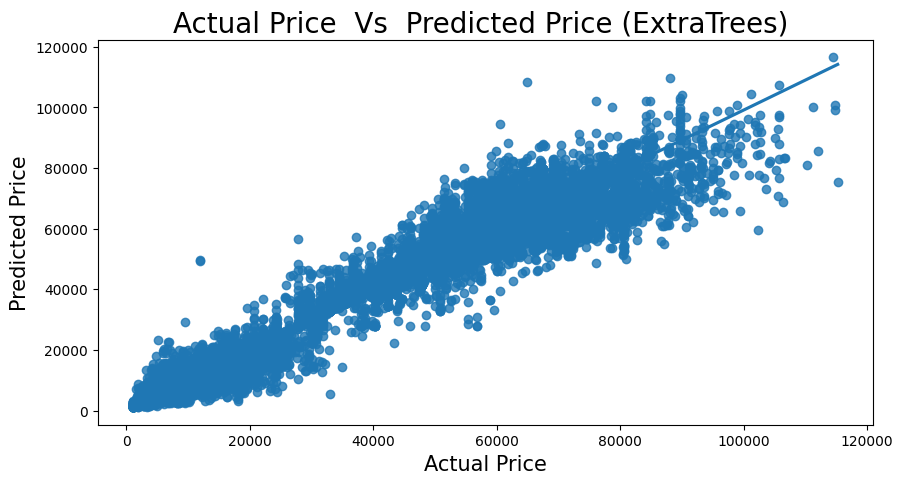

In [131]:
# Display the graphic between actual price and prediction price.
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result_et)
plt.title('Actual Price  Vs  Predicted Price (ExtraTrees) ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()

In [132]:
# Calculates the percentage of equal values
matching_values = (result_et['Price_actual'] == result_et['Price_pred']).sum()
total_rows = len(result_et)
percentage_matching = (matching_values / total_rows) * 100
print(f'The percentage of the same value: {percentage_matching:.2f}%')

# Calculate the percentage of values ​​where the price difference is not more than 500
within_500_diff = abs(result_et['Price_pred'] - result_et['Price_actual']) <= 500
matching_within_500 = within_500_diff.sum()
total_rows = len(result_et)
percentage_within_500 = (matching_within_500 / total_rows) * 100
print(f'Price percentage with a difference of no more than 500: {percentage_within_500:.2f}%')

The percentage of the same value: 25.81%
Price percentage with a difference of no more than 500: 71.89%


# DECISION TREE REGRESSOR

In [ ]:
#Trainig the model with Decision Tree Regressor
dt_model.fit(X_train, y_train)
# Predict the model with test data
y_pred = dt_model.predict(X_test)
out_dt=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result_dt = df_1.merge(out_dt,left_index=True,right_index=True)

result_dt.sample(20)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
149426,Air_India,AI-768,Kolkata,Afternoon,one,Night,Chennai,Economy,8.08,17,8264,8264,7844.0
14458,Indigo,6E-2616,Delhi,Night,one,Morning,Bangalore,Economy,9.75,24,3354,3354,4189.0
146671,Indigo,6E-725,Kolkata,Evening,zero,Night,Hyderabad,Economy,2.17,38,4011,4011,2750.0
282212,Vistara,UK-876,Hyderabad,Night,one,Night,Bangalore,Business,23.33,36,41974,41974,38099.0
89555,AirAsia,I5-818,Bangalore,Early_Morning,one,Morning,Delhi,Economy,5.50,29,2723,2723,3467.0
113865,Vistara,UK-818,Bangalore,Evening,one,Evening,Hyderabad,Economy,24.25,36,6262,6262,6262.0
261175,Air_India,AI-505,Bangalore,Morning,one,Night,Chennai,Business,13.17,47,60396,60396,60396.0
79995,Indigo,6E-5308,Mumbai,Afternoon,zero,Evening,Chennai,Economy,1.92,21,4158,4158,3633.0
33873,Air_India,AI-459,Delhi,Early_Morning,one,Night,Hyderabad,Economy,14.83,39,5631,5631,5232.0
122515,Vistara,UK-772,Kolkata,Morning,one,Night,Delhi,Economy,12.58,20,6723,6723,6723.0


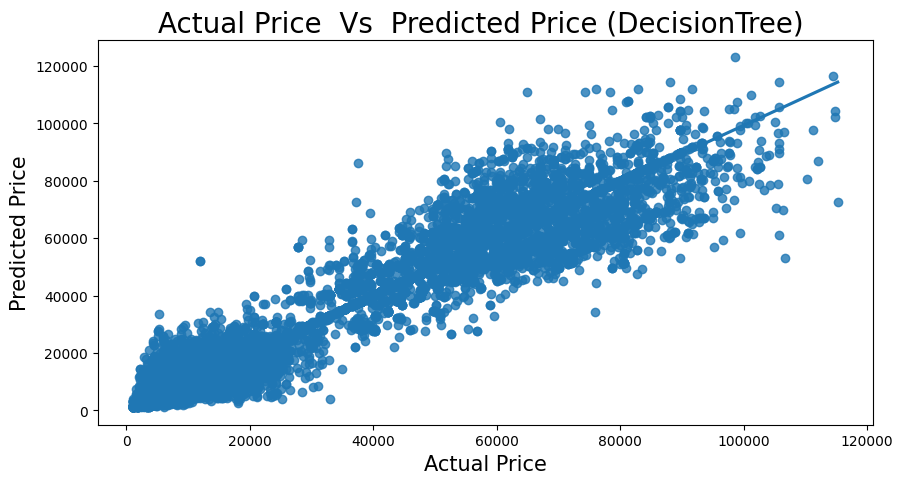

In [ ]:
# Display the graphic between actual price and prediction price.
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result_dt)
plt.title('Actual Price  Vs  Predicted Price (DecisionTree) ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()

In [ ]:
# Calculates the percentage of equal values
matching_values = (result_dt['Price_actual'] == result_dt['Price_pred']).sum()
total_rows = len(result_dt)
percentage_matching = (matching_values / total_rows) * 100
print(f'The percentage of the same value: {percentage_matching:.2f}%')

# Calculate the percentage of values ​​where the price difference is not more than 500
within_500_diff = abs(result_dt['Price_pred'] - result_dt['Price_actual']) <= 500
matching_within_500 = within_500_diff.sum()
total_rows = len(result_dt)
percentage_within_500 = (matching_within_500 / total_rows) * 100
print(f'Price percentage with a difference of no more than 500: {percentage_within_500:.2f}%')

The percentage of the same value: 69.92%
Price percentage with a difference of no more than 500: 79.35%


Từ các phản hồi và đánh giá được thu thập, có thể kết luận rằng mô hình **RandomForestRegressor** là chính xác nhất trong bài toán dự đoán giá vé chuyến bay. Sự kết hợp của nhiều cây quyết định độc lập, khả năng tự động hóa quyết định, và khả năng chống *overfitting* đã giúp mô hình này đạt được hiệu suất ấn tượng trên nhiều tập dữ liệu và điều kiện thử nghiệm. Điều này làm cho **RandomForestRegressor** trở thành sự lựa chọn lý tưởng cho ứng dụng dự đoán giá vé chuyến bay, mang lại sự chính xác và độ tin cậy trong dự báo giá trị.